<a href="https://colab.research.google.com/github/spatidar2109/ML_Learing/blob/main/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! rm -rf sample_data  

In [2]:
import pandas as pd

telecom = pd.read_csv("/content/Telecom.csv")

dum_telecom = pd.get_dummies(telecom, drop_first=True)

In [4]:
telecom.head()

,Gender,TT_gt_100,Response
0,F,Y,N
1,M,N,N
2,M,N,N
3,F,Y,Y
4,F,N,N


In [5]:
dum_telecom.head()

,Gender_M,TT_gt_100_Y,Response_Y
0,0,1,0
1,1,0,0
2,1,0,0
3,0,1,1
4,0,0,0


In [7]:
telecom.shape, dum_telecom.shape

((150, 3), (150, 3))

In [8]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [9]:
X = dum_telecom.iloc[:,0:2]
y = dum_telecom.iloc[:,2]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

In [11]:
X_train

,Gender_M,TT_gt_100_Y
108,1,0
8,1,1
29,0,1
131,1,0
121,1,1
...,...,...
94,0,1
87,1,0
42,0,1
102,1,0


In [12]:
X_test

,Gender_M,TT_gt_100_Y
23,1,0
59,0,1
143,1,0
88,1,0
104,1,0
101,0,1
120,1,1
40,1,0
80,1,0
39,0,1


In [14]:
y_train

108    0
8      0
29     1
131    0
121    0
      ..
94     1
87     0
42     1
102    0
117    0
Name: Response_Y, Length: 105, dtype: uint8

In [15]:
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train) # Model Building

MultinomialNB()

In [16]:
y_probs = multinomial.predict_proba(X_test)

In [17]:
y_probs

array([[0.75885329, 0.24114671],
       [0.22488756, 0.77511244],
       [0.75885329, 0.24114671],
       [0.75885329, 0.24114671],
       [0.75885329, 0.24114671],
       [0.22488756, 0.77511244],
       [0.50107639, 0.49892361],
       [0.75885329, 0.24114671],
       [0.75885329, 0.24114671],
       [0.22488756, 0.77511244],
       [0.22488756, 0.77511244],
       [0.22488756, 0.77511244],
       [0.50107639, 0.49892361],
       [0.22488756, 0.77511244],
       [0.75885329, 0.24114671],
       [0.75885329, 0.24114671],
       [0.22488756, 0.77511244],
       [0.75885329, 0.24114671],
       [0.50107639, 0.49892361],
       [0.22488756, 0.77511244],
       [0.22488756, 0.77511244],
       [0.75885329, 0.24114671],
       [0.75885329, 0.24114671],
       [0.22488756, 0.77511244],
       [0.75885329, 0.24114671],
       [0.75885329, 0.24114671],
       [0.22488756, 0.77511244],
       [0.22488756, 0.77511244],
       [0.22488756, 0.77511244],
       [0.22488756, 0.77511244],
       [0.

In [18]:
y_pred = multinomial.predict(X_test) # Applying built on test data

In [19]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0], dtype=uint8)

In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[18  4]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        22
           1       0.84      0.91      0.87        23

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45

0.8666666666666667


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_probs = multinomial.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)



In [23]:
thresholds, fpr, tpr 

(array([1.77511244, 0.77511244, 0.52380952, 0.49892361, 0.24114671]),
 array([0.        , 0.04545455, 0.18181818, 0.36363636, 1.        ]),
 array([0.        , 0.91304348, 0.91304348, 0.95652174, 1.        ]))

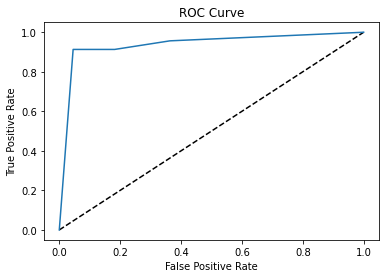

0.9377470355731224

In [24]:
# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

roc_auc_score(y_test, y_pred_prob)

In [ ]:
# ===============================================================================

In [25]:
import pandas as pd

Default = pd.read_csv("/content/Default.csv")
dum_Default = pd.get_dummies(Default, drop_first=True)

from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

X = dum_Default.iloc[:,[0,1,3]]
y = dum_Default.iloc[:,2]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

In [26]:
Default.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [27]:
dum_Default.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,0,1
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


In [28]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

############## Model Evaluation ##############
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[2883   17]
 [  72   28]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2900
           1       0.62      0.28      0.39       100

    accuracy                           0.97      3000
   macro avg       0.80      0.64      0.69      3000
weighted avg       0.96      0.97      0.96      3000

0.9703333333333334


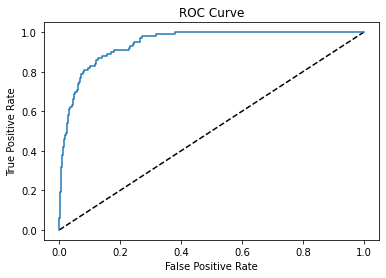

0.9440344827586207

In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
probs = gaussian.predict_proba(X_test)
y_pred_prob = probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_pred_prob) 

In [ ]:
##============================================================================================================

In [32]:
import pandas as pd

telecom = pd.read_csv("/content/Telecom.csv")

dum_telecom = pd.get_dummies(telecom, drop_first=True)

from sklearn.model_selection import StratifiedKFold
#from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
#from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

X = dum_telecom.iloc[:,0:2]
y = dum_telecom.iloc[:,2]

In [34]:
#kfold = KFold(n_splits=5,)
kfold = StratifiedKFold(n_splits=5)
multinomial = MultinomialNB()

In [35]:
results = cross_val_score(multinomial, X, y, cv=kfold, 
                          scoring='roc_auc')
print(results)
print("ROC AUC: %.4f (%.4f)" % (results.mean(), results.std()))

[0.79333333 0.84       0.96205357 0.94196429 0.85714286]
ROC AUC: 0.8789 (0.0636)
